In [1]:
# import packages
import pandas as pd
import numpy as np
from numpy import where


# Install autoimpute package
!pip install autoimpute

#Importing and installing pycaret

!pip install pycaret
from pycaret.utils import version
from pycaret.regression import *
import pandas as pd
# Checking Pycaret version
version()

'2.3.1'

In [2]:
# Read the excel dataset
df = pd.read_excel('Alfred_Dataset.xlsx')

In [3]:
# check sample
print(df.shape)
df.head()

(180, 36)


,Date,Target_GreaterToronto_Single_Family_HPI,1Yr_MetroOntario_CPI_All,1M_MetroOntario_CPI_all,1Yr_MetroOntario_CPI_Shelter,1M_MetroOntario_CPI_Shelter,Month,1Yr_Lag,1M_Lag,1Yr_GreaterVancounver_Single_Family_HPI,1M_GreaterVancounver_Single_Family_HPI,1Yr_Calgary_Single_Family_HPI,1M_Calgary_Single_Family_HPI,1Yr_Montreal_Single_Family_HPI,1M_Montreal_Single_Family_HPI,1M_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RetailSales_Toronto,1M_RetailSales_Toronto,1M_Avg_Temperature,1Yr_Avg_Temp,1M_Snow_onGround,1Yr_Snow_onGround,1Yr_Toronto_Median_Annual_Income_Couple_Families,1Yr_Toronto_Median_Annual_Income_Lone_Parent_Families,1M_Toronto_ConstructionCompletionsUnits,1Yr_Toronto_ConstructionCompletionsUnits,1M_Toronto_ConstructionStartsUnits,1Yr_Toronto_ConstructionStartsUnits,1M_Toronto_UnempRate_15_54_yrs,1Yr_BankRate_Canada,1M_BankRate_Canada,1M_Population,1Y_S&P500_Close,1M_S&P500_Close,1Y_Bachelors_Degree_Ontario_NewReg
0,2006-01-01,106.4,105.1,107.6,107.4,110.2,1,100.0,105.7,100.0,110.4,100.0,114.7,100.0,103.8,14281,119542,4437136,4486253,-3.446452,-6.829677,1.348387,1.070968,69900.0,31600.0,3296,3173,3401,1681,NaN,2.75,3.50,5035000.000,1181.27,1248.29,11928
1,2006-02-01,107.4,105.8,108.2,107.9,111.7,2,101.3,106.4,100.5,112.6,101.1,118.9,100.9,104.7,14336,125963,4479503,4528948,0.200000,-3.995000,0.251613,1.192857,69900.0,31600.0,4427,2761,2660,2296,NaN,2.75,3.75,5042500.000,1203.60,1280.08,11928
2,2006-03-01,108.7,106.4,107.9,108.2,112.0,3,102.4,107.4,101.1,114.8,102.6,125.7,101.9,106.4,14601,124172,4376561,4556689,-3.567500,-1.621290,0.771429,0.825806,69900.0,31600.0,2882,5443,1539,2941,NaN,2.75,3.75,5050011.172,1180.59,1280.66,11928
3,2006-04-01,109.6,106.5,108.8,108.2,112.2,4,103.4,108.7,101.6,117.1,104.1,133.3,102.8,106.6,14700,127187,4355371,4568608,1.339032,7.737333,0.045161,0.540000,69900.0,31600.0,3179,2026,3091,4448,5.9,2.75,4.00,5057533.532,1156.85,1294.87,11928
4,2006-05-01,110.4,106.6,109.1,108.6,111.7,5,104.2,109.6,102.8,119.4,105.4,141.8,101.8,107.4,14786,128118,4371228,4563003,8.201333,11.894194,0.000000,0.000000,69900.0,31600.0,2735,3097,3247,3313,5.6,2.75,4.25,5065067.097,1191.50,1310.61,11928


In [4]:
# Dataset feature details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 36 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Date                                                   180 non-null    datetime64[ns]
 1   Target_GreaterToronto_Single_Family_HPI                180 non-null    float64       
 2   1Yr_MetroOntario_CPI_All                               180 non-null    float64       
 3   1M_MetroOntario_CPI_all                                180 non-null    float64       
 4   1Yr_MetroOntario_CPI_Shelter                           180 non-null    float64       
 5   1M_MetroOntario_CPI_Shelter                            180 non-null    float64       
 6   Month                                                  180 non-null    int64         
 7   1Yr_Lag                                                180 non-null    

In [5]:
# Removing non Toronto locations
df.drop(['1Yr_GreaterVancounver_Single_Family_HPI','1M_GreaterVancounver_Single_Family_HPI','1Yr_Calgary_Single_Family_HPI','1M_Calgary_Single_Family_HPI','1Yr_Montreal_Single_Family_HPI','1M_Montreal_Single_Family_HPI'],axis='columns', inplace=True)

In [6]:
# New column for date year
df['Year'] = df['Date'].dt.year

In [7]:
# Removing date feature
df.drop(['Date'], axis='columns', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 30 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Target_GreaterToronto_Single_Family_HPI                180 non-null    float64
 1   1Yr_MetroOntario_CPI_All                               180 non-null    float64
 2   1M_MetroOntario_CPI_all                                180 non-null    float64
 3   1Yr_MetroOntario_CPI_Shelter                           180 non-null    float64
 4   1M_MetroOntario_CPI_Shelter                            180 non-null    float64
 5   Month                                                  180 non-null    int64  
 6   1Yr_Lag                                                180 non-null    float64
 7   1M_Lag                                                 180 non-null    float64
 8   1M_RealEstate_GDP_Trading_AdjustedConstant_BasePri

In [9]:
# Missing data before imputation
print("Amount of data missing before imputation takes place")
pd.DataFrame(df.isnull().sum(), columns=["records missing"])

Amount of data missing before imputation takes place


,records missing
Target_GreaterToronto_Single_Family_HPI,0
1Yr_MetroOntario_CPI_All,0
1M_MetroOntario_CPI_all,0
1Yr_MetroOntario_CPI_Shelter,0
1M_MetroOntario_CPI_Shelter,0
Month,0
1Yr_Lag,0
1M_Lag,0
1M_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,0
1Yr_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,0


In [10]:
# Autoimpute

from autoimpute.imputations import SingleImputer

print("Imputing missing data in one line of code with the default SingleImputer")
imputer = SingleImputer(strategy="mean")
data_imputed = imputer.fit_transform(df)
print("Imputation Successful!")

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Imputing missing data in one line of code with the default SingleImputer
Imputation Successful!


In [11]:
# Missing data after imputation
print("Amount of data missing after imputation takes place")
pd.DataFrame(data_imputed.isnull().sum(), columns=["records missing"])

Amount of data missing after imputation takes place


,records missing
Target_GreaterToronto_Single_Family_HPI,0
1Yr_MetroOntario_CPI_All,0
1M_MetroOntario_CPI_all,0
1Yr_MetroOntario_CPI_Shelter,0
1M_MetroOntario_CPI_Shelter,0
Month,0
1Yr_Lag,0
1M_Lag,0
1M_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,0
1Yr_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,0


In [12]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 30 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Target_GreaterToronto_Single_Family_HPI                180 non-null    float64
 1   1Yr_MetroOntario_CPI_All                               180 non-null    float64
 2   1M_MetroOntario_CPI_all                                180 non-null    float64
 3   1Yr_MetroOntario_CPI_Shelter                           180 non-null    float64
 4   1M_MetroOntario_CPI_Shelter                            180 non-null    float64
 5   Month                                                  180 non-null    int64  
 6   1Yr_Lag                                                180 non-null    float64
 7   1M_Lag                                                 180 non-null    float64
 8   1M_RealEstate_GDP_Trading_AdjustedConstant_BasePri

In [13]:
# Keeping 10% of the dataset for prediction
data_final = data_imputed.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = data_imputed.drop(data_final.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_final.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (162, 30)
Unseen Data For Predictions: (18, 30)


In [14]:
# Intiliazes pycaret envioronment with the dataset and target feature
exp_reg101 = setup(data = data_final, target = 'Target_GreaterToronto_Single_Family_HPI', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Target_GreaterToronto_Single_Family_HPI
2,Original Data,"(162, 30)"
3,Missing Values,False
4,Numeric Features,26
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(113, 52)"


In [15]:
#Comparing all models to evaluate performance
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,1.4589,5.5838,2.0945,0.9984,0.0104,0.0077,0.0150
lasso,Lasso Regression,1.5449,5.4105,2.1211,0.9983,0.0102,0.0080,0.4020
en,Elastic Net,1.5545,5.5086,2.1341,0.9983,0.0102,0.0080,0.0150
br,Bayesian Ridge,1.5314,5.9762,2.1602,0.9982,0.0100,0.0076,0.0140
gbr,Gradient Boosting Regressor,1.7437,6.9518,2.4425,0.9978,0.0117,0.0092,0.0380
ridge,Ridge Regression,1.7290,8.2046,2.4642,0.9976,0.0119,0.0089,0.0160
et,Extra Trees Regressor,1.7697,11.1777,2.8187,0.9970,0.0125,0.0087,0.0830
lr,Linear Regression,2.1407,9.9651,2.8502,0.9969,0.0139,0.0113,0.4980
rf,Random Forest Regressor,2.0003,11.7741,2.9587,0.9967,0.0133,0.0099,0.0730
ada,AdaBoost Regressor,3.5035,22.4289,4.5645,0.9926,0.0245,0.0196,0.0450


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [16]:
# Gradient Boosting Regressor
gb_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6305,21.8771,4.6773,0.9945,0.0189,0.0119
1,1.4732,3.5347,1.8801,0.9989,0.0087,0.0071
2,2.5366,11.8638,3.4444,0.9971,0.0146,0.0119
3,1.0414,2.2952,1.5150,0.9985,0.0071,0.0054
4,1.6343,5.0342,2.2437,0.9982,0.0109,0.0087
5,1.9170,7.7201,2.7785,0.9964,0.0151,0.0116
6,2.4053,7.8456,2.8010,0.9967,0.0157,0.0140
7,1.6108,5.4480,2.3341,0.9988,0.0102,0.0081
8,0.9216,1.2880,1.1349,0.9993,0.0071,0.0058
9,1.2660,2.6112,1.6159,0.9992,0.0090,0.0075


In [17]:
#trained model object is stored in the variable 'gb_model' 
# to print the hyper parameters 

print(gb_model)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [18]:
# Tuning model using hyperparameters

tuned_gb_model = tune_model(gb_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.4204,29.0497,5.3898,0.9927,0.0221,0.0151
1,2.8491,16.2344,4.0292,0.9950,0.0163,0.0120
2,1.5585,4.8377,2.1995,0.9988,0.0098,0.0073
3,1.2776,2.3979,1.5485,0.9984,0.0080,0.0068
4,1.6595,4.3431,2.0840,0.9984,0.0113,0.0095
5,2.1570,18.0421,4.2476,0.9916,0.0214,0.0121
6,1.7015,3.6631,1.9139,0.9985,0.0119,0.0104
7,1.7365,9.9870,3.1602,0.9978,0.0117,0.0079
8,0.8154,0.7471,0.8644,0.9996,0.0058,0.0055
9,2.7410,10.1737,3.1896,0.9968,0.0192,0.0167


In [19]:
# Tuned model object is stored in the variable 'tuned_gb_model' 
# to print the hyper parameters for the tuned model
print(tuned_gb_model)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


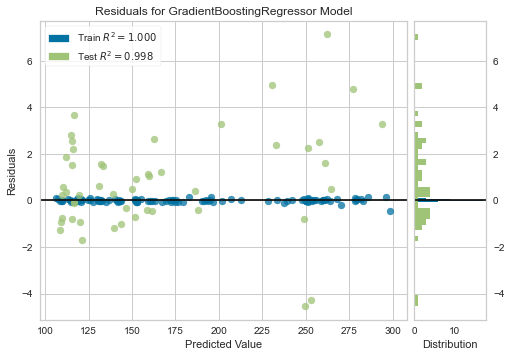

In [20]:
# Gradient Boosting - Residual Plot
plot_model(tuned_gb_model)

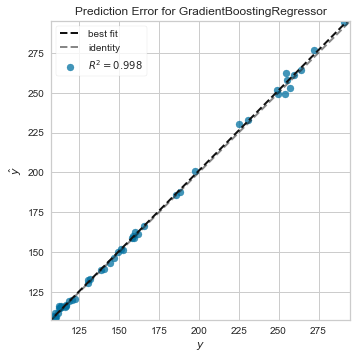

In [21]:
# Gradient Boosting - Error Plot
plot_model(tuned_gb_model, plot = 'error')

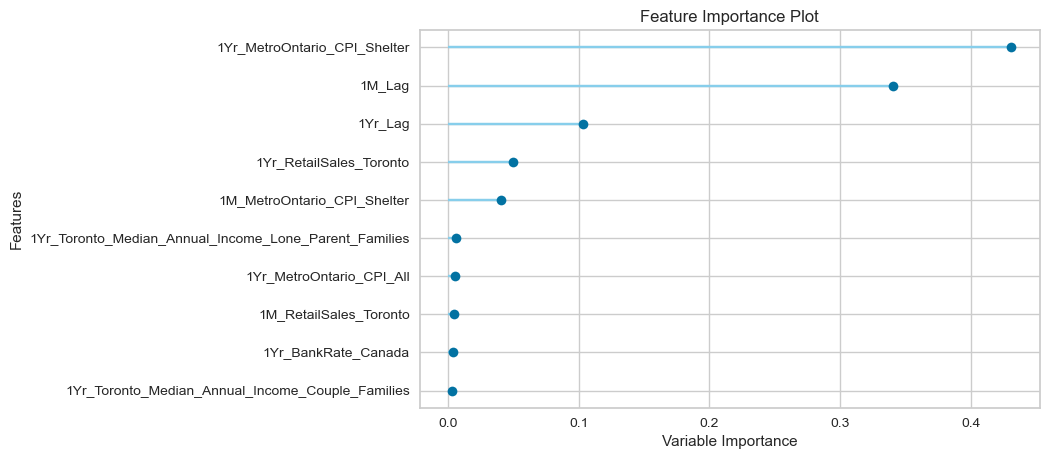

In [22]:
# Gradient Boosting - Feature Importance Plot
plot_model(tuned_gb_model, plot='feature')

In [23]:
# Predict on test dataset(30% of the dataset)
predict_model(tuned_gb_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.6567,5.0399,2.2450,0.9984,0.0122,0.0098


,1Yr_MetroOntario_CPI_All,1Yr_MetroOntario_CPI_Shelter,1M_MetroOntario_CPI_Shelter,1Yr_Lag,1M_Lag,1M_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RetailSales_Toronto,1M_RetailSales_Toronto,1M_Avg_Temperature,...,1Y_Bachelors_Degree_Ontario_NewReg_18411,Year_2006,Year_2007,Year_2008,Year_2010,Year_2012,Year_2013,Year_2020,Target_GreaterToronto_Single_Family_HPI,Label
0,125.300003,133.399994,135.500000,176.800003,196.399994,18850.0,144278.0,6061876.0,6714713.0,4.115161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.899994,201.182985
1,109.099998,112.699997,114.400002,109.900002,116.699997,15322.0,134777.0,4660043.0,4804840.0,21.287743,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,116.900002,116.823755
2,118.000000,121.500000,124.300003,135.100006,144.399994,16910.0,138132.0,5568388.0,5782159.0,-1.715484,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,146.800003,146.456447
3,111.400002,115.900002,120.300003,120.099998,112.800003,15244.0,134080.0,5084312.0,4756477.0,-8.752258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.199997,115.031873
4,115.699997,120.000000,122.000000,132.399994,137.000000,16944.0,133607.0,5232303.0,5509105.0,-0.478065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.600006,138.878479
5,107.900002,112.000000,112.900002,107.400002,110.000000,14563.0,130489.0,4556689.0,4596097.0,-2.880645,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,111.699997,112.043271
6,121.099998,123.599998,125.400002,141.800003,152.399994,17525.0,147221.0,5607908.0,5510256.0,21.524517,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,152.300003,151.581283
7,114.800003,120.000000,117.800003,119.000000,119.199997,16183.0,135318.0,5178196.0,5009883.0,19.185484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.900002,119.966380
8,111.699997,116.300003,120.300003,120.599998,112.199997,15489.0,133188.0,5054058.0,4822933.0,-3.643571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.699997,116.353393
9,119.400002,122.000000,124.300003,137.000000,146.800003,17296.0,137728.0,5509105.0,5674446.0,-0.337241,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,149.500000,150.006335


In [24]:
# Finalize model for deployment
final_gb = finalize_model(tuned_gb_model)

In [25]:
#Final gradient boosting parameters for deployment
print(final_gb)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [26]:
# predict on final model
predict_model(final_gb)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0385,0.0025,0.0502,1.0000,0.0003,0.0003


,1Yr_MetroOntario_CPI_All,1Yr_MetroOntario_CPI_Shelter,1M_MetroOntario_CPI_Shelter,1Yr_Lag,1M_Lag,1M_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RetailSales_Toronto,1M_RetailSales_Toronto,1M_Avg_Temperature,...,1Y_Bachelors_Degree_Ontario_NewReg_18411,Year_2006,Year_2007,Year_2008,Year_2010,Year_2012,Year_2013,Year_2020,Target_GreaterToronto_Single_Family_HPI,Label
0,125.300003,133.399994,135.500000,176.800003,196.399994,18850.0,144278.0,6061876.0,6714713.0,4.115161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.899994,197.937514
1,109.099998,112.699997,114.400002,109.900002,116.699997,15322.0,134777.0,4660043.0,4804840.0,21.287743,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,116.900002,116.922440
2,118.000000,121.500000,124.300003,135.100006,144.399994,16910.0,138132.0,5568388.0,5782159.0,-1.715484,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,146.800003,146.724761
3,111.400002,115.900002,120.300003,120.099998,112.800003,15244.0,134080.0,5084312.0,4756477.0,-8.752258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.199997,112.099317
4,115.699997,120.000000,122.000000,132.399994,137.000000,16944.0,133607.0,5232303.0,5509105.0,-0.478065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.600006,138.637744
5,107.900002,112.000000,112.900002,107.400002,110.000000,14563.0,130489.0,4556689.0,4596097.0,-2.880645,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,111.699997,111.708512
6,121.099998,123.599998,125.400002,141.800003,152.399994,17525.0,147221.0,5607908.0,5510256.0,21.524517,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,152.300003,152.305915
7,114.800003,120.000000,117.800003,119.000000,119.199997,16183.0,135318.0,5178196.0,5009883.0,19.185484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.900002,120.909677
8,111.699997,116.300003,120.300003,120.599998,112.199997,15489.0,133188.0,5054058.0,4822933.0,-3.643571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.699997,112.754921
9,119.400002,122.000000,124.300003,137.000000,146.800003,17296.0,137728.0,5509105.0,5674446.0,-0.337241,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,149.500000,149.526076


In [27]:
# predict on unseen data (10% of the dataset)
unseen_predictions = predict_model(final_gb, data=data_unseen)
unseen_predictions.head()

,Target_GreaterToronto_Single_Family_HPI,1Yr_MetroOntario_CPI_All,1M_MetroOntario_CPI_all,1Yr_MetroOntario_CPI_Shelter,1M_MetroOntario_CPI_Shelter,Month,1Yr_Lag,1M_Lag,1M_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,...,1Yr_Toronto_ConstructionStartsUnits,1M_Toronto_UnempRate_15_54_yrs,1Yr_BankRate_Canada,1M_BankRate_Canada,1M_Population,1Y_S&P500_Close,1M_S&P500_Close,1Y_Bachelors_Degree_Ontario_NewReg,Year,Label
0,259.7,136.0,138.0,142.6,146.8,7,253.3,259.4,21309,157942,...,3363,4.9,1.75,2.0,6110555.704,2816.29,2941.76,10446,2019,259.743062
1,259.8,135.9,138.8,142.9,147.3,8,251.5,259.7,21224,168021,...,2494,4.7,1.75,2.0,6115328.006,2901.52,2980.38,10446,2019,259.798659
2,260.8,135.2,138.5,143.2,147.4,9,251.3,259.8,21203,174390,...,3570,5.0,1.75,2.0,6120104.034,2913.98,2926.46,10446,2019,260.785474
3,262.4,135.6,137.5,143.7,147.3,10,251.4,260.8,21244,168393,...,3719,5.0,2.00,2.0,6124883.793,2711.74,2976.74,10446,2019,262.431430
4,263.8,135.1,137.9,143.9,148.3,11,250.4,262.4,21251,167042,...,4116,4.8,2.00,2.0,6129667.285,2760.17,3037.56,10446,2019,263.870536


In [29]:
# Saving the model
save_model(final_gb, 'Final gradient Boosting Model 09June2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='Target_GreaterToronto_Single_Family_HPI',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value...
                                            learning_rate=0.15, loss='ls',
                                            max_depth=7, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.02,
                     

In [30]:
# Random Forest Model
random_forest_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.7413,38.8080,6.2296,0.9903,0.0240,0.0154
1,2.4805,15.1201,3.8885,0.9953,0.0157,0.0106
2,3.0573,21.9438,4.6844,0.9947,0.0180,0.0128
3,0.6014,0.7369,0.8584,0.9995,0.0055,0.0036
4,2.1347,10.1463,3.1853,0.9963,0.0141,0.0105
5,1.5222,4.1254,2.0311,0.9981,0.0122,0.0098
6,1.5610,3.2922,1.8145,0.9986,0.0101,0.0091
7,2.8545,20.6801,4.5475,0.9955,0.0174,0.0134
8,0.8331,0.8386,0.9157,0.9995,0.0064,0.0058
9,1.2172,2.0498,1.4317,0.9994,0.0098,0.0082


In [31]:
#trained model object is stored in the variable 'random_forest_model' 
# to print the hyper parameters 

print(random_forest_model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


In [32]:
# Tuning model using hyperparameters

tuned_random_forest_model = tune_model(random_forest_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3877,18.3424,4.2828,0.9954,0.0175,0.0149
1,1.2515,2.1316,1.4600,0.9993,0.0069,0.0061
2,3.6352,35.7969,5.9831,0.9913,0.0226,0.0149
3,1.0314,1.7668,1.3292,0.9988,0.0071,0.0055
4,1.8259,4.9600,2.2271,0.9982,0.0127,0.0109
5,1.3653,3.0628,1.7501,0.9986,0.0145,0.0107
6,1.5810,6.6996,2.5884,0.9972,0.0120,0.0085
7,3.2716,31.2018,5.5859,0.9933,0.0210,0.0150
8,0.9679,1.1069,1.0521,0.9994,0.0072,0.0066
9,1.5722,3.3468,1.8294,0.9990,0.0100,0.0091


In [33]:
# Tuned model object is stored in the variable 'tuned_random_forest_model' 
# to print the hyper parameters for the tuned model
print(tuned_random_forest_model)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=240, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


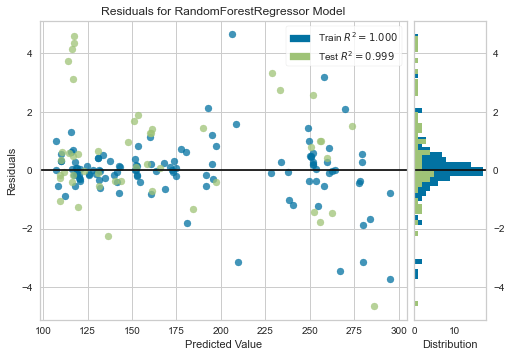

In [34]:
# Random Forest - Residual Plot
plot_model(tuned_random_forest_model)

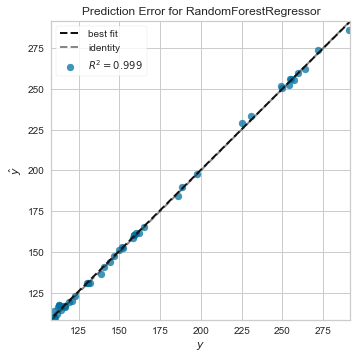

In [35]:
# Random Forest - Error Plot
plot_model(tuned_random_forest_model, plot = 'error')

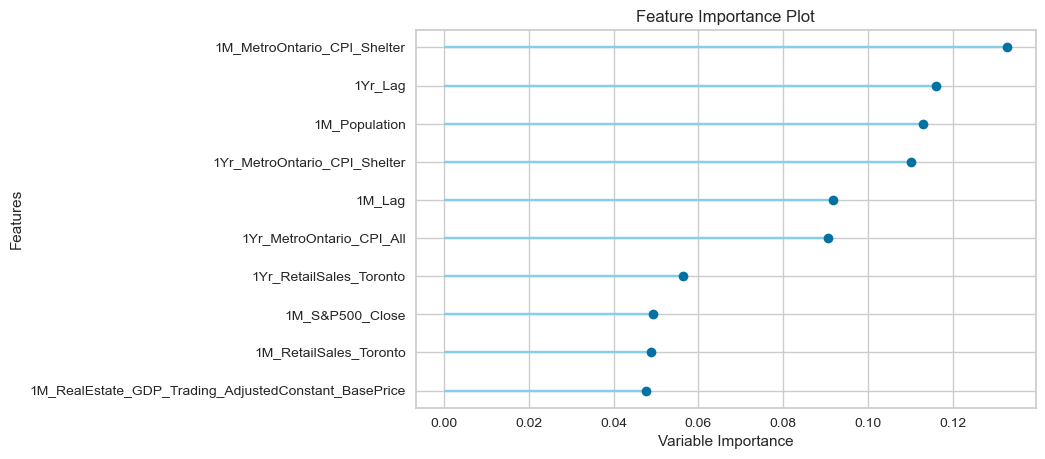

In [36]:
# Random Forest - Feature Importance Plot
plot_model(tuned_random_forest_model, plot='feature')

In [37]:
# Predict on test dataset(30% of the dataset)
predict_model(tuned_random_forest_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.3426,3.4279,1.8514,0.9989,0.0130,0.0088


,1Yr_MetroOntario_CPI_All,1Yr_MetroOntario_CPI_Shelter,1M_MetroOntario_CPI_Shelter,1Yr_Lag,1M_Lag,1M_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RetailSales_Toronto,1M_RetailSales_Toronto,1M_Avg_Temperature,...,1Y_Bachelors_Degree_Ontario_NewReg_18411,Year_2006,Year_2007,Year_2008,Year_2010,Year_2012,Year_2013,Year_2020,Target_GreaterToronto_Single_Family_HPI,Label
0,125.300003,133.399994,135.500000,176.800003,196.399994,18850.0,144278.0,6061876.0,6714713.0,4.115161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.899994,197.504364
1,109.099998,112.699997,114.400002,109.900002,116.699997,15322.0,134777.0,4660043.0,4804840.0,21.287743,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,116.900002,116.718982
2,118.000000,121.500000,124.300003,135.100006,144.399994,16910.0,138132.0,5568388.0,5782159.0,-1.715484,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,146.800003,147.758019
3,111.400002,115.900002,120.300003,120.099998,112.800003,15244.0,134080.0,5084312.0,4756477.0,-8.752258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.199997,116.348555
4,115.699997,120.000000,122.000000,132.399994,137.000000,16944.0,133607.0,5232303.0,5509105.0,-0.478065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.600006,136.361992
5,107.900002,112.000000,112.900002,107.400002,110.000000,14563.0,130489.0,4556689.0,4596097.0,-2.880645,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,111.699997,111.650633
6,121.099998,123.599998,125.400002,141.800003,152.399994,17525.0,147221.0,5607908.0,5510256.0,21.524517,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,152.300003,152.401521
7,114.800003,120.000000,117.800003,119.000000,119.199997,16183.0,135318.0,5178196.0,5009883.0,19.185484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.900002,119.639314
8,111.699997,116.300003,120.300003,120.599998,112.199997,15489.0,133188.0,5054058.0,4822933.0,-3.643571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.699997,117.291881
9,119.400002,122.000000,124.300003,137.000000,146.800003,17296.0,137728.0,5509105.0,5674446.0,-0.337241,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,149.500000,151.199477


In [38]:
# Finalize model for deployment
final_rf = finalize_model(tuned_random_forest_model)

In [39]:
#Final random forest parameters for deployment
print(final_rf)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=240, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


In [40]:
# predict on final model
predict_model(final_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.4208,0.4769,0.6906,0.9999,0.0038,0.0025


,1Yr_MetroOntario_CPI_All,1Yr_MetroOntario_CPI_Shelter,1M_MetroOntario_CPI_Shelter,1Yr_Lag,1M_Lag,1M_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RetailSales_Toronto,1M_RetailSales_Toronto,1M_Avg_Temperature,...,1Y_Bachelors_Degree_Ontario_NewReg_18411,Year_2006,Year_2007,Year_2008,Year_2010,Year_2012,Year_2013,Year_2020,Target_GreaterToronto_Single_Family_HPI,Label
0,125.300003,133.399994,135.500000,176.800003,196.399994,18850.0,144278.0,6061876.0,6714713.0,4.115161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.899994,198.442766
1,109.099998,112.699997,114.400002,109.900002,116.699997,15322.0,134777.0,4660043.0,4804840.0,21.287743,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,116.900002,116.686310
2,118.000000,121.500000,124.300003,135.100006,144.399994,16910.0,138132.0,5568388.0,5782159.0,-1.715484,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,146.800003,147.218844
3,111.400002,115.900002,120.300003,120.099998,112.800003,15244.0,134080.0,5084312.0,4756477.0,-8.752258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.199997,112.851802
4,115.699997,120.000000,122.000000,132.399994,137.000000,16944.0,133607.0,5232303.0,5509105.0,-0.478065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.600006,138.067261
5,107.900002,112.000000,112.900002,107.400002,110.000000,14563.0,130489.0,4556689.0,4596097.0,-2.880645,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,111.699997,111.818109
6,121.099998,123.599998,125.400002,141.800003,152.399994,17525.0,147221.0,5607908.0,5510256.0,21.524517,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,152.300003,152.328794
7,114.800003,120.000000,117.800003,119.000000,119.199997,16183.0,135318.0,5178196.0,5009883.0,19.185484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.900002,120.722924
8,111.699997,116.300003,120.300003,120.599998,112.199997,15489.0,133188.0,5054058.0,4822933.0,-3.643571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.699997,113.196288
9,119.400002,122.000000,124.300003,137.000000,146.800003,17296.0,137728.0,5509105.0,5674446.0,-0.337241,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,149.500000,149.502976


In [41]:
# predict on unseen data (10% of the dataset)
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Target_GreaterToronto_Single_Family_HPI,1Yr_MetroOntario_CPI_All,1M_MetroOntario_CPI_all,1Yr_MetroOntario_CPI_Shelter,1M_MetroOntario_CPI_Shelter,Month,1Yr_Lag,1M_Lag,1M_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,1Yr_RealEstate_GDP_Trading_AdjustedConstant_BasePrice,...,1Yr_Toronto_ConstructionStartsUnits,1M_Toronto_UnempRate_15_54_yrs,1Yr_BankRate_Canada,1M_BankRate_Canada,1M_Population,1Y_S&P500_Close,1M_S&P500_Close,1Y_Bachelors_Degree_Ontario_NewReg,Year,Label
0,259.7,136.0,138.0,142.6,146.8,7,253.3,259.4,21309,157942,...,3363,4.9,1.75,2.0,6110555.704,2816.29,2941.76,10446,2019,259.881825
1,259.8,135.9,138.8,142.9,147.3,8,251.5,259.7,21224,168021,...,2494,4.7,1.75,2.0,6115328.006,2901.52,2980.38,10446,2019,260.368188
2,260.8,135.2,138.5,143.2,147.4,9,251.3,259.8,21203,174390,...,3570,5.0,1.75,2.0,6120104.034,2913.98,2926.46,10446,2019,260.528024
3,262.4,135.6,137.5,143.7,147.3,10,251.4,260.8,21244,168393,...,3719,5.0,2.00,2.0,6124883.793,2711.74,2976.74,10446,2019,262.537731
4,263.8,135.1,137.9,143.9,148.3,11,250.4,262.4,21251,167042,...,4116,4.8,2.00,2.0,6129667.285,2760.17,3037.56,10446,2019,263.293199


In [42]:
# Saving the model
save_model(final_rf, 'Final random forest Model 09June2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='Target_GreaterToronto_Single_Family_HPI',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value...
                  RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                                        criterion='mse', max_depth=8,
                                        max_features='sqrt', max_leaf_nodes=None,
                                        max_samples=None,
                          